In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
pd.__version__

'0.25.3'

In [44]:
from sklearn.linear_model import LinearRegression

## Data

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [46]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [47]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')

In [48]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20'],
      dtype='object')

In [49]:
source = '../dataset_covid/covid19countryinfo.csv'
cols = ['country','pop','tests','testpop','density','medianage','urbanpop','quarantine','schools','restrictions','hospibed','smokers','sex0','sex14','sex25','sex54','sex64','sex65plus','sexratio','lung','femalelung','malelung']
descritive_df = pd.read_csv(source, usecols=cols, quotechar='"', engine='python', sep=',', error_bad_lines=False)
descritive_df["pop"] = descritive_df["pop"].str.replace(",","").astype(float)


In [50]:
descritive_df = descritive_df.dropna(how='all')

In [51]:
descritive_df[descritive_df['country']=='France']

,country,pop,tests,testpop,density,medianage,urbanpop,quarantine,schools,restrictions,...,sex0,sex14,sex25,sex54,sex64,sex65plus,sexratio,lung,femalelung,malelung
51,France,65273511.0,11071.0,5895.90019,119.0,42.0,82.0,3/17/2020,NaN,NaN,...,1.05,1.05,1.05,1.01,0.93,0.75,0.96,13.15,9.64,17.69


In [115]:
descritive_df[descritive_df["quarantine"].isna() == False][["country", "quarantine"]]

,country,quarantine
5,Argentina,3/20/2020
9,Austria,3/16/2020
15,Belgium,3/18/2020
30,China,1/24/2020
31,Colombia,3/25/2020
41,Denmark,3/16/2020
51,France,3/17/2020
56,Germany,3/21/2020
70,India,3/23/2020
72,Iran,3/13/2020


In [52]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


## Data using population ratio

In [208]:
df_pop_ratio = df[df["Province/State"].isna()]
all_t = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_pop_ratio["Country/Region"])
all_countries_with_descriptive = list(descritive_df["country"])
all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[descritive_df["country"] == country]["pop"])[0])
        df_pop_ratio.loc[df_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

In [209]:
df_deaths_pop_ratio = df_deaths[df_deaths["Province/State"].isna()]
all_t = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]

all_countries_from_df = list(df_deaths_pop_ratio["Country/Region"])
all_countries_with_descriptive = list(descritive_df["country"])
all_full_countries = list(set(all_countries_from_df).intersection(all_countries_with_descriptive))

# print(all_full_countries)
for country in all_full_countries:
    for t in all_t:
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])
        raw_val = int(list(df_deaths_pop_ratio[df_deaths_pop_ratio["Country/Region"] == country][t])[0])
        raw_pop = int(list(descritive_df[descritive_df["country"] == country]["pop"])[0])
        df_deaths_pop_ratio.loc[df_deaths_pop_ratio["Country/Region"] == country, t] = raw_val / raw_pop
#         print(df_pop_ratio[df_pop_ratio["Country/Region"] == country][t])
#         print(country, ' - ', descritive_df[descritive_df["country"] == country]["pop"])

## Data fitering and pivoting

### Pick countries of interest

In [210]:
# selected_countries= ['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'US', 'Turkey']
selected_countries= ['France', 'Germany', 'United Kingdom', 'Italy', 'Spain', 'Netherlands', 'Turkey']
# Korea, South'

In [211]:
#list(df['Country/Region'])

In [212]:
# df_deaths[df_deaths['Country/Region'] == 'Korea, South']

### Filter

In [213]:
countries = df['Country/Region'].unique()
df_filtered = df[df['Country/Region'].isin(selected_countries) & df['Province/State'].isna()]
df_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,12612,14282,16018,19856,22304,25233,29155,32964,37575,40174
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,2994,3631,4204,4749,5560,6412,7431,8603,9762,10866
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,359,670,1236,1529,1872,2433,3629,5698,7402,9217
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,3983,5018,5683,6650,8077,9529,11658,14543,17089,19522


In [214]:
countries = df_deaths['Country/Region'].unique()
df_filtered_deaths = df_deaths[df_deaths['Country/Region'].isin(selected_countries) & df_deaths['Province/State'].isna()]
df_filtered_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
116,NaN,France,46.2276,2.2137,0,0,0,0,0,0,...,450,562,674,860,1100,1331,1696,1995,2314,2606
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,67,84,94,123,157,206,267,342,433,533
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779
169,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,106,136,179,213,276,356,434,546,639,771
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,1043,1375,1772,2311,2808,3647,4365,5138,5982,6803
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,4,9,30,37,44,59,75,92,108,131
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,177,233,281,335,422,465,578,759,1019,1228


In [215]:
countries = df_pop_ratio['Country/Region'].unique()
df_pop_ratio_filtered = df_pop_ratio[df_pop_ratio['Country/Region'].isin(selected_countries) & df_pop_ratio['Province/State'].isna()]
df_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
116,NaN,France,46.2276,2.2137,0.0,0.0,3.064030e-08,4.596045e-08,4.596045e-08,4.596045e-08,...,0.000193,0.000219,0.000245,0.000304,0.000342,0.000387,0.000447,0.000505,0.000576,0.000615
120,NaN,Germany,51.0000,9.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.193546e-08,...,0.000237,0.000265,0.000297,0.000347,0.000394,0.000445,0.000524,0.000607,0.000689,0.000741
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000778,0.000886,0.000978,0.001057,0.001144,0.001230,0.001333,0.001431,0.001529,0.001616
169,NaN,Netherlands,52.1326,5.2913,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000175,0.000212,0.000245,0.000277,0.000324,0.000374,0.000434,0.000502,0.000570,0.000634
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000437,0.000543,0.000615,0.000751,0.000853,0.001059,0.001236,0.001406,0.001566,0.001713
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000004,0.000008,0.000015,0.000018,0.000022,0.000029,0.000043,0.000068,0.000088,0.000109
223,NaN,United Kingdom,55.3781,-3.4360,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000059,0.000074,0.000084,0.000098,0.000119,0.000140,0.000172,0.000214,0.000252,0.000288


In [216]:
countries = df_deaths_pop_ratio['Country/Region'].unique()
df_deaths_pop_ratio_filtered = df_deaths_pop_ratio[df_deaths_pop_ratio['Country/Region'].isin(selected_countries) & df_deaths_pop_ratio['Province/State'].isna()]
df_deaths_pop_ratio_filtered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
116,NaN,France,46.2276,2.2137,0.0,0.0,0.0,0.0,0.0,0.0,...,6.894068e-06,8.609924e-06,1.032578e-05,1.317533e-05,1.685217e-05,2.039112e-05,2.598297e-05,0.000031,0.000035,0.000040
120,NaN,Germany,51.0000,9.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,7.996759e-07,1.002579e-06,1.121933e-06,1.468062e-06,1.873867e-06,2.458705e-06,3.186768e-06,0.000004,0.000005,0.000006
137,NaN,Italy,43.0000,12.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,6.668671e-05,7.980242e-05,9.056954e-05,1.005097e-04,1.127984e-04,1.240948e-04,1.358709e-04,0.000151,0.000166,0.000178
169,NaN,Netherlands,52.1326,5.2913,0.0,0.0,0.0,0.0,0.0,0.0,...,6.186215e-06,7.937030e-06,1.044653e-05,1.243079e-05,1.610750e-05,2.077634e-05,2.532846e-05,0.000032,0.000037,0.000045
201,NaN,Spain,40.0000,-4.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,2.230788e-05,2.940876e-05,3.789987e-05,4.942810e-05,6.005803e-05,7.800272e-05,9.335944e-05,0.000110,0.000128,0.000146
213,NaN,Turkey,38.9637,35.2433,0.0,0.0,0.0,0.0,0.0,0.0,...,4.742761e-08,1.067121e-07,3.557070e-07,4.387054e-07,5.217037e-07,6.995572e-07,8.892676e-07,0.000001,0.000001,0.000002
223,NaN,United Kingdom,55.3781,-3.4360,0.0,0.0,0.0,0.0,0.0,0.0,...,2.607312e-06,3.432224e-06,4.139292e-06,4.934743e-06,6.216303e-06,6.849718e-06,8.514273e-06,0.000011,0.000015,0.000018


### Pivot

In [217]:
index = [col for col in df.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot = df_filtered[index].T
df_pivot.columns = list(df_filtered['Country/Region'])
countries_lst = df_pivot.columns

In [218]:
index = [col for col in df_deaths.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pivot_deaths = df_filtered_deaths[index].T
df_pivot_deaths.columns = list(df_filtered_deaths['Country/Region'])
countries_lst = df_pivot_deaths.columns

In [219]:
index = [col for col in df_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_pop_ratio_pivot = df_pop_ratio_filtered[index].T
df_pop_ratio_pivot.columns = list(df_pop_ratio_filtered['Country/Region'])
countries_lst = df_pop_ratio_pivot.columns

In [220]:
index = [col for col in df_deaths_pop_ratio.columns if col not in ['Lat', 'Long', 'Country/Region', 'Province/State']]
df_deaths_pop_ratio_pivot = df_deaths_pop_ratio_filtered[index].T
df_deaths_pop_ratio_pivot.columns = list(df_deaths_pop_ratio_filtered['Country/Region'])
countries_lst = df_deaths_pop_ratio_pivot.columns

In [221]:
df_deaths_pop_ratio_pivot.tail()

,France,Germany,Italy,Netherlands,Spain,Turkey,United Kingdom
3/25/20,0.000020,0.000002,0.000124,0.000021,0.000078,6.995572e-07,0.000007
3/26/20,0.000026,0.000003,0.000136,0.000025,0.000093,8.892676e-07,0.000009
3/27/20,0.000031,0.000004,0.000151,0.000032,0.000110,1.090835e-06,0.000011
3/28/20,0.000035,0.000005,0.000166,0.000037,0.000128,1.280545e-06,0.000015
3/29/20,0.000040,0.000006,0.000178,0.000045,0.000146,1.553254e-06,0.000018


In [222]:
list(df_deaths_pop_ratio_pivot.Italy)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.653936154690399e-08,
 3.307872309380798e-08,
 4.9618084640711975e-08,
 1.1577553082832794e-07,
 1.6539361546903993e-07,
 1.984723385628479e-07,
 2.8116914629736785e-07,
 3.4732659248498385e-07,
 4.796414848602158e-07,
 5.623382925947357e-07,
 8.600468004390076e-07,
 1.3066095622054153e-06,
 1.7697116855187271e-06,
 2.447825508941791e-06,
 3.2582542247400863e-06,
 3.85367124042863e-06,
 6.053406326166861e-06,
 7.657724396216548e-06,
 1.0436337136096419e-05,
 1.3678051999289601e-05,
 1.3678051999289601e-05,
 2.0938831718380455e-05,
 2.3833219989088653e-05,
 2.9919705038349323e-05,
 3.569194221821881e-05,
 4.139802195190069e-05,
 4.9254218686680086e-05,
 5.631652606720809e-05,
 6.66867057571169e-05,
 7.980241946381177e-05,
 9.056954383084626e-05,
 0.00010050970012053556,
 0.00011279844574988523,
 0.0001240948

## Plots

### Original data

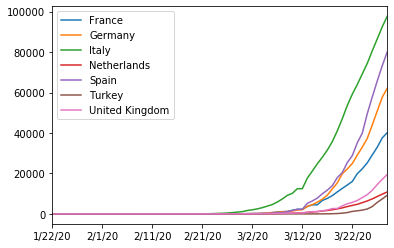

In [223]:
df_pivot.plot()

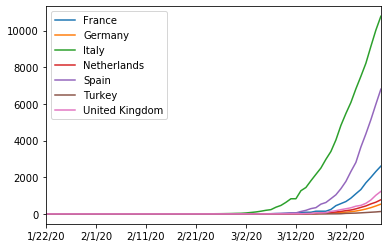

In [224]:
df_pivot_deaths.plot()

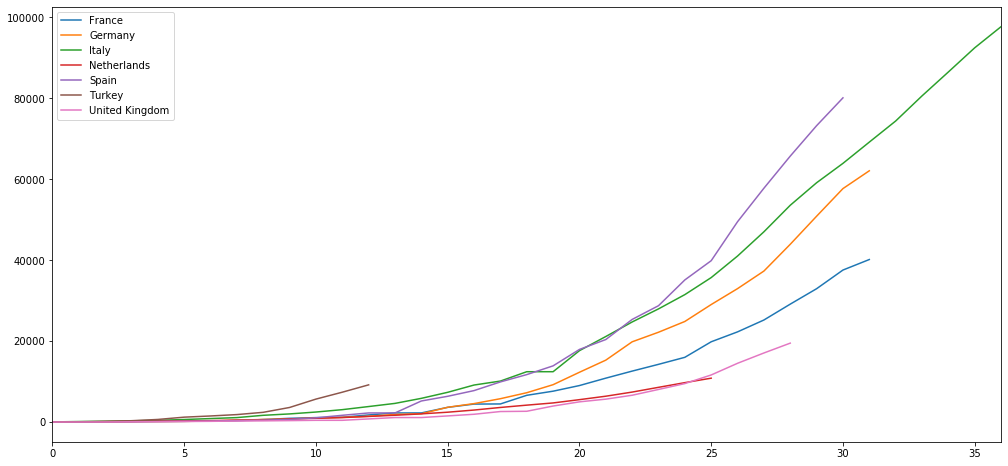

In [225]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

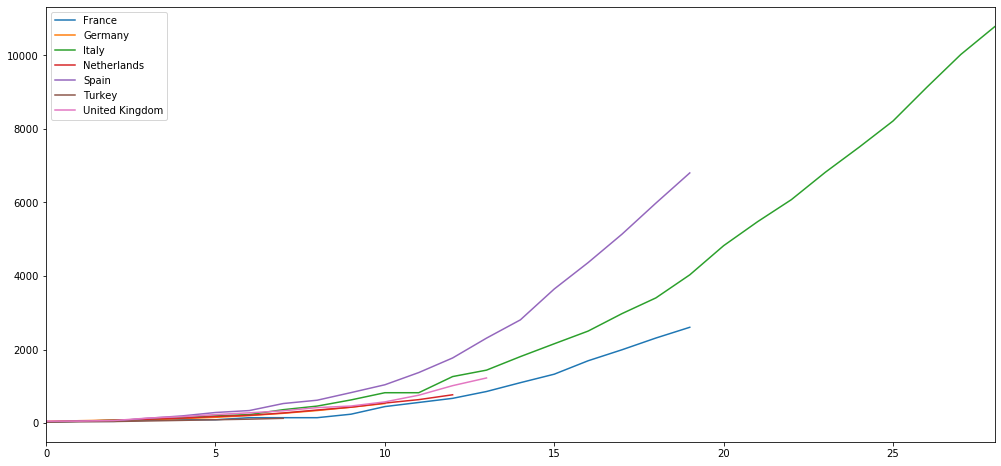

In [226]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot_deaths[df_pivot_deaths[col]>=30][col].reset_index(drop=True)
#     ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()

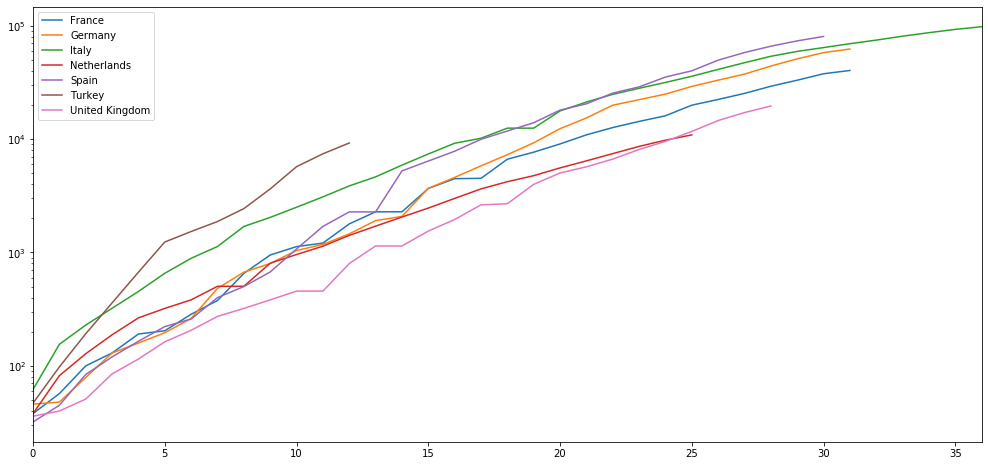

In [227]:
fig, ax = plt.subplots(1, figsize=(17,8))
for col in countries_lst:
    ts = df_pivot[df_pivot[col]>=30][col].reset_index(drop=True)
    #ts['school closure'] = descritive_df['schools']
    #ts = ts
    ts.plot(ax=ax)
plt.yscale('log')
plt.legend()

### Population ratio data

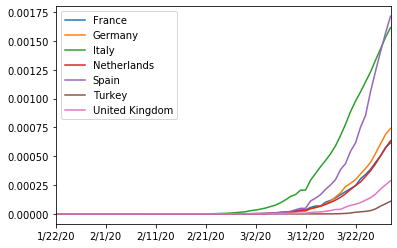

In [228]:
df_pop_ratio_pivot.plot()

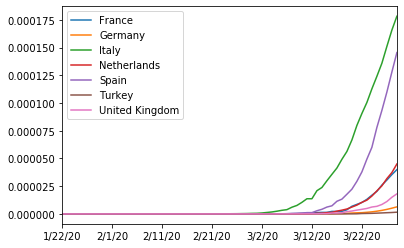

In [229]:
df_deaths_pop_ratio_pivot.plot()

## Aligning data from different countries

#### on day a given number of deaths has been reached

In [230]:
death_thresh = 50

In [231]:
new_ts_data = {}
for col in df_pivot_deaths.columns:
    tmp = df_pivot_deaths[col]
    selected_vals = list(tmp[tmp > death_thresh])
    new_ts_data[col] = selected_vals
df_deaths_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

#### on day a given death population ration has been reached

In [232]:
# ratio_thresh = 1.1577553082832794e-07
ratio_thresh = 1.0e-07 # ref: an early Italian death_pop_ratio from Italy

In [233]:
new_ts_data = {}
for col in df_deaths_pop_ratio_pivot.columns:
    tmp = df_deaths_pop_ratio_pivot[col]
    selected_vals = list(tmp[tmp > ratio_thresh])
    new_ts_data[col] = selected_vals
# print(new_ts_data)
# df_deaths_pop_ratio_pivot_aligned = pd.DataFrame.from_dict(new_ts_data)
df_deaths_pop_ratio_pivot_aligned = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in new_ts_data.items() ]))

In [234]:
df_deaths_pop_ratio_pivot_aligned.head()

,France,Germany,Italy,Netherlands,Spain,Turkey,United Kingdom
0,1.378814e-07,1.074192e-07,1.157755e-07,1.750816e-07,1.069409e-07,1.067121e-07,1.178446e-07
1,1.685217e-07,1.312901e-07,1.653936e-07,1.750816e-07,2.138819e-07,3.557070e-07,1.178446e-07
2,2.910829e-07,2.029028e-07,1.984723e-07,2.334421e-07,3.635992e-07,4.387054e-07,1.178446e-07
3,2.910829e-07,2.864511e-07,2.811691e-07,2.918026e-07,5.988693e-07,5.217037e-07,3.093421e-07
4,5.055650e-07,3.341929e-07,3.473266e-07,2.918026e-07,7.485866e-07,6.995572e-07,3.093421e-07


## Plotting aligned data

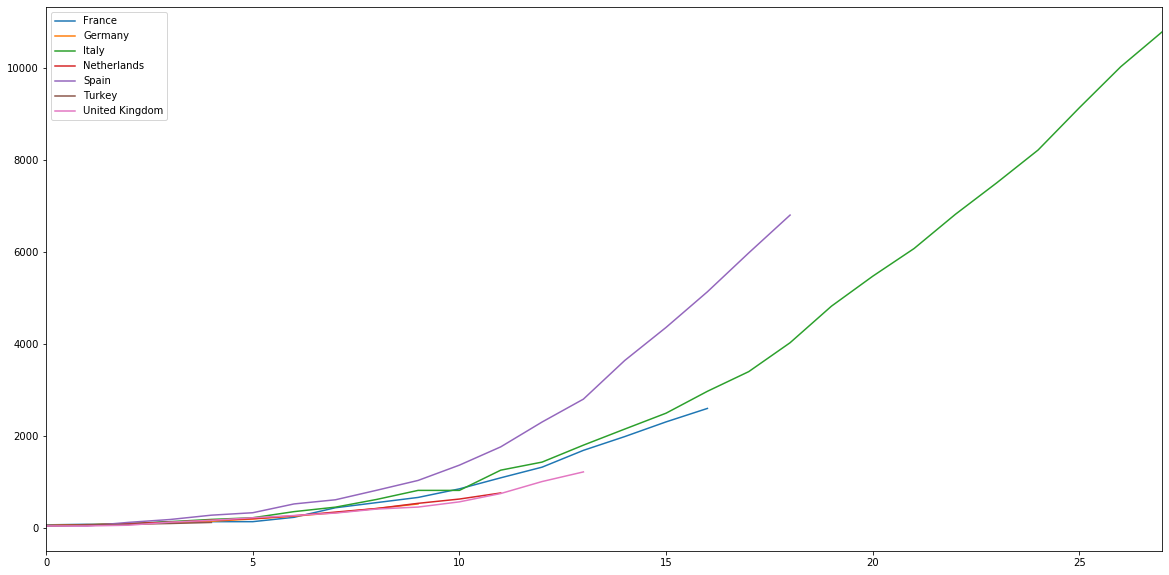

In [235]:
df_deaths_pivot_aligned.plot(figsize=(20,10))

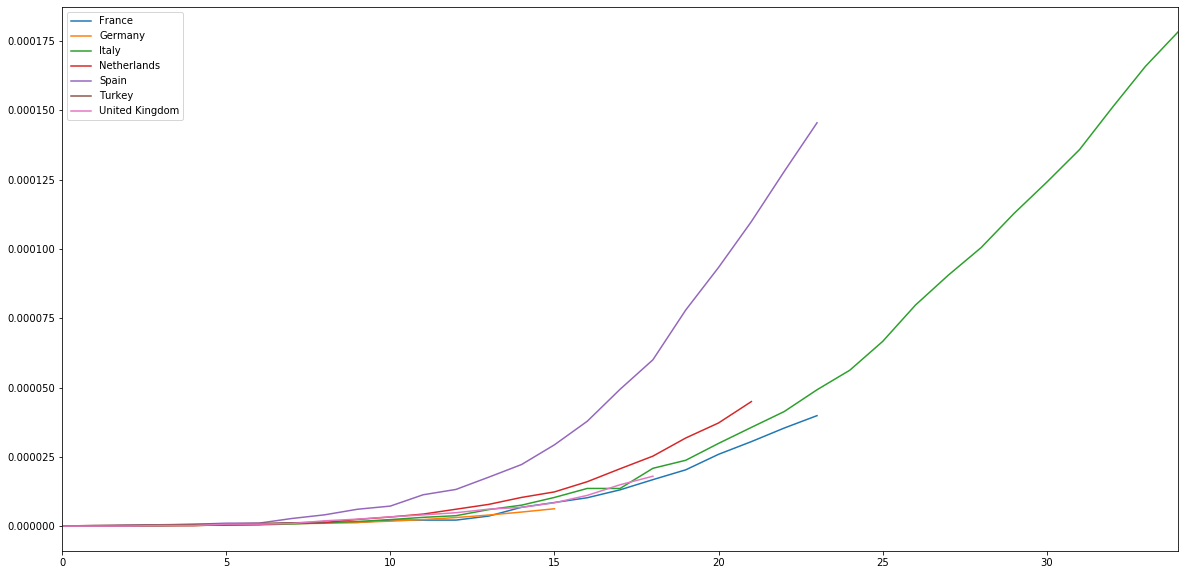

In [236]:
df_deaths_pop_ratio_pivot_aligned.plot(figsize=(20,10))

## Growth

In [237]:
df_pivot[['{}_growth'.format(col) for col in countries_lst]] = df_pivot.diff()/df_pivot

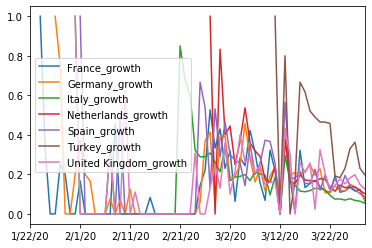

In [238]:
df_pivot.filter(regex='growth').plot()

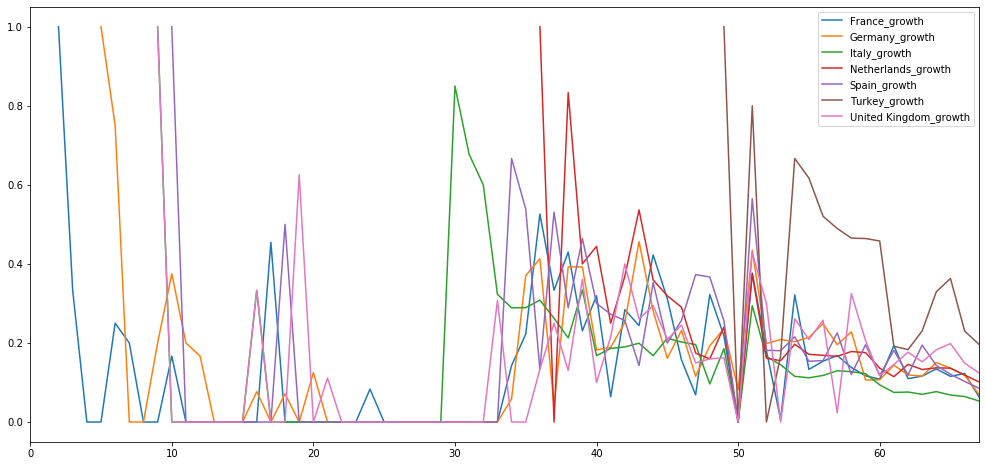

In [239]:
fig, ax = plt.subplots(1, figsize=(17,8))
growth = df_pivot.filter(regex='growth').columns
for col in growth:
    ts = df_pivot[col].reset_index(drop=True)
    ts.plot(ax=ax)
plt.legend()